In [68]:
import yfinance as yf
import os
import pandas as pd

In [69]:
btc_ticker = yf.Ticker("BTC-USD")

In [70]:
btc = btc_ticker.history(period="max")

In [71]:
btc

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,0.0,0.0
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,0.0,0.0
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,0.0,0.0
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,0.0,0.0
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,0.0,0.0
...,...,...,...,...,...,...,...
2024-04-17 00:00:00+00:00,63831.847656,64486.363281,59768.585938,61276.691406,41915247049,0.0,0.0
2024-04-18 00:00:00+00:00,61275.316406,64125.687500,60833.480469,63512.753906,36006307335,0.0,0.0
2024-04-19 00:00:00+00:00,63510.750000,65481.597656,59651.390625,63843.570312,49920425401,0.0,0.0


In [72]:
btc.index = pd.to_datetime(btc.index)

In [73]:
del btc["Dividends"]
del btc["Stock Splits"]

In [74]:
btc.columns = [c.lower() for c in btc.columns]

<Axes: xlabel='Date'>

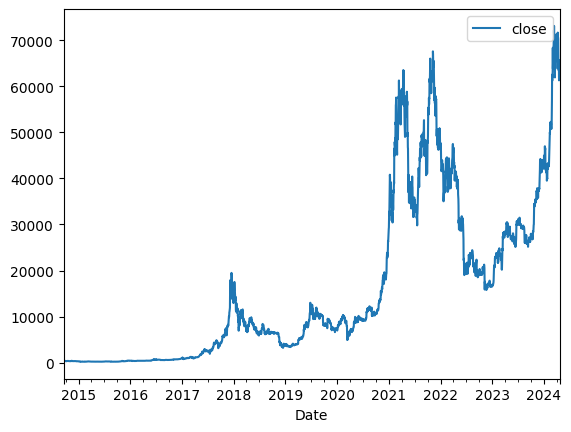

In [75]:
btc.plot.line(y="close", use_index=True)

In [76]:
bitcoin_wiki = pd.read_csv("wikipedia_edits_bitcoin.csv", index_col=0, parse_dates=True)

In [77]:
bitcoin_wiki

,edit_count,sentiment,neg_sentiment
2009-04-06,0.133333,-0.018351,0.025000
2009-04-07,0.000000,0.000000,0.000000
2009-04-08,0.000000,0.000000,0.000000
2009-04-09,0.000000,0.000000,0.000000
2009-04-10,0.000000,0.000000,0.000000
...,...,...,...
2024-04-17,0.200000,-0.091111,0.116667
2024-04-18,0.200000,-0.091111,0.116667
2024-04-19,0.200000,-0.091111,0.116667
2024-04-20,0.233333,-0.122229,0.150000


In [78]:
btc = btc.tz_localize(None)
bitcoin_wiki = bitcoin_wiki.tz_localize(None)

In [79]:
btc = btc.merge(bitcoin_wiki, left_index=True, right_index=True)

In [80]:
btc

,open,high,low,close,volume,edit_count,sentiment,neg_sentiment
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,5.033333,-0.232191,0.532718
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,5.066667,-0.232760,0.532718
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,5.200000,-0.235415,0.549385
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,5.200000,-0.233185,0.549385
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,5.233333,-0.204017,0.532718
...,...,...,...,...,...,...,...,...
2024-04-17,63831.847656,64486.363281,59768.585938,61276.691406,41915247049,0.200000,-0.091111,0.116667
2024-04-18,61275.316406,64125.687500,60833.480469,63512.753906,36006307335,0.200000,-0.091111,0.116667
2024-04-19,63510.750000,65481.597656,59651.390625,63843.570312,49920425401,0.200000,-0.091111,0.116667
2024-04-20,63851.101562,65442.457031,63172.402344,64994.441406,23097485495,0.233333,-0.122229,0.150000


In [81]:
btc["tomorrow"] = btc["close"].shift(-1)

In [82]:
btc

,open,high,low,close,volume,edit_count,sentiment,neg_sentiment,tomorrow
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,5.033333,-0.232191,0.532718,424.440002
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,5.066667,-0.232760,0.532718,394.795990
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,5.200000,-0.235415,0.549385,408.903992
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,5.200000,-0.233185,0.549385,398.821014
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,5.233333,-0.204017,0.532718,402.152008
...,...,...,...,...,...,...,...,...,...
2024-04-17,63831.847656,64486.363281,59768.585938,61276.691406,41915247049,0.200000,-0.091111,0.116667,63512.753906
2024-04-18,61275.316406,64125.687500,60833.480469,63512.753906,36006307335,0.200000,-0.091111,0.116667,63843.570312
2024-04-19,63510.750000,65481.597656,59651.390625,63843.570312,49920425401,0.200000,-0.091111,0.116667,64994.441406
2024-04-20,63851.101562,65442.457031,63172.402344,64994.441406,23097485495,0.233333,-0.122229,0.150000,64934.664062


In [83]:
btc["target"] = (btc["tomorrow"] > btc["close"]).astype(int)

In [84]:
btc["target"].value_counts()

target
1    1859
0    1646
Name: count, dtype: int64

In [85]:
# Define the period for RSI calculation
period = 14

In [86]:
# Calculate price differences
delta = btc['close'].diff()

In [87]:
# Separate positive and negative price changes
gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()

In [88]:
# Calculate Relative Strength (RS)
rs = gain / loss

In [89]:
# Calculate RSI
rsi = 100 - (100 / (1 + rs))

In [90]:
# Add RSI as a new column to your DataFrame
btc['RSI'] = rsi

In [91]:
btc

,open,high,low,close,volume,edit_count,sentiment,neg_sentiment,tomorrow,target,RSI
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,5.033333,-0.232191,0.532718,424.440002,0,NaN
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,5.066667,-0.232760,0.532718,394.795990,0,NaN
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,5.200000,-0.235415,0.549385,408.903992,1,NaN
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,5.200000,-0.233185,0.549385,398.821014,0,NaN
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,5.233333,-0.204017,0.532718,402.152008,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2024-04-17,63831.847656,64486.363281,59768.585938,61276.691406,41915247049,0.200000,-0.091111,0.116667,63512.753906,1,40.535412
2024-04-18,61275.316406,64125.687500,60833.480469,63512.753906,36006307335,0.200000,-0.091111,0.116667,63843.570312,1,39.828476
2024-04-19,63510.750000,65481.597656,59651.390625,63843.570312,49920425401,0.200000,-0.091111,0.116667,64994.441406,1,41.754199
2024-04-20,63851.101562,65442.457031,63172.402344,64994.441406,23097485495,0.233333,-0.122229,0.150000,64934.664062,0,41.975580


In [92]:
# Define the period of 9 days for SMA calculation
period_9SMA = 9

In [93]:
# Calculate Simple Moving Average (SMA) for 9 days
sma_9d = btc['close'].rolling(window=period_9SMA).mean()

In [94]:
# Add SMA (9 days) as a new column to your DataFrame
btc['SMA(9)'] = sma_9d

In [95]:
# Define the period of 14 days for SMA calculation
period_14SMA = 14

In [96]:
# Calculate Simple Moving Average (SMA) for 14 days
sma_14d = btc['close'].rolling(window=period_14SMA).mean()

In [97]:
# Add SMA (14 days) as a new column to your DataFrame
btc['SMA(14)'] = sma_14d

In [98]:
# Define the period of 7 days for EMA calculation
period_7EMA = 7

In [99]:
# Calculate Exponential Moving Average (EMA) for 7 days
ema_7d = btc['close'].ewm(span=period_7EMA, adjust=False).mean()

In [100]:
# Add EMA (7 days) as a new column to your DataFrame
btc['EMA(7)'] = ema_7d

In [101]:
# Define the period of 25 days for EMA calculation
period_25EMA = 25

In [102]:
# Calculate Exponential Moving Average (EMA) for 25 days
ema_25d = btc['close'].ewm(span=period_25EMA, adjust=False).mean()

In [103]:
# Add EMA (25 days) as a new column to your DataFrame
btc['EMA(25)'] = ema_25d

In [104]:
# Define the period of 99 days for EMA calculation
period_99EMA = 99

In [105]:
# Calculate Exponential Moving Average (EMA) for 99 days
ema_99d = btc['close'].ewm(span=period_99EMA, adjust=False).mean()

In [106]:
# Add EMA (99 days) as a new column to your DataFrame
btc['EMA(99)'] = ema_99d

The shorter moving average (12-day) is faster and responsible for most MACD movements. The longer moving average (26-day) is slower and less reactive to price changes in the underlying security.

In [108]:
# Define the periods for short-term and long-term EMAs for MACD calculation.
short_period = 12
long_period = 26
signal_period = 9

In [109]:
# Calculate Short-Term EMA
short_ema = btc['close'].ewm(span=short_period, min_periods=1, adjust=False).mean()

In [110]:
# Calculate Long-Term EMA
long_ema = btc['close'].ewm(span=long_period, min_periods=1, adjust=False).mean()

In [111]:
# Calculate MACD line
macd_line = short_ema - long_ema

In [112]:
# Calculate Signal line (typically a 9-day EMA of MACD)
signal_line = macd_line.ewm(span=signal_period, min_periods=1, adjust=False).mean()

In [113]:
# Calculate MACD Histogram
macd_histogram = macd_line - signal_line

In [115]:
# Add MACD, Signal Line, and MACD Histogram as new columns to your DataFrame
btc['MACD'] = macd_line
btc['Signal Line'] = signal_line
btc['MACD Histogram'] = macd_histogram

In [116]:
btc

,open,high,low,close,volume,edit_count,sentiment,neg_sentiment,tomorrow,target,RSI,SMA(9),SMA(14),EMA(7),EMA(25),EMA(99),MACD,Signal Line,MACD Histogram
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,5.033333,-0.232191,0.532718,424.440002,0,NaN,NaN,NaN,457.334015,457.334015,457.334015,0.000000,0.000000,0.000000
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,5.066667,-0.232760,0.532718,394.795990,0,NaN,NaN,NaN,449.110512,454.803706,456.676135,-2.624024,-0.524805,-2.099219
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,5.200000,-0.235415,0.549385,408.903992,1,NaN,NaN,NaN,435.531881,450.187728,455.438532,-7.014744,-1.822793,-5.191951
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,5.200000,-0.233185,0.549385,398.821014,0,NaN,NaN,NaN,428.874909,447.012056,454.507841,-9.249402,-3.308115,-5.941288
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,5.233333,-0.204017,0.532718,402.152008,1,NaN,NaN,NaN,421.361435,443.305053,453.394104,-11.699137,-4.986319,-6.712818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-17,63831.847656,64486.363281,59768.585938,61276.691406,41915247049,0.200000,-0.091111,0.116667,63512.753906,1,40.535412,66117.593316,67235.346261,64578.911092,66634.233915,58808.210421,-800.914302,217.331381,-1018.245683
2024-04-18,61275.316406,64125.687500,60833.480469,63512.753906,36006307335,0.200000,-0.091111,0.116667,63843.570312,1,39.828476,65492.453125,66878.482701,64312.371796,66394.120068,58902.301290,-925.197970,-11.174489,-914.023481
2024-04-19,63510.750000,65481.597656,59651.390625,63843.570312,49920425401,0.200000,-0.091111,0.116667,64994.441406,1,41.754199,64743.085069,66593.191964,64195.171425,66197.923933,59001.126671,-985.637734,-206.067138,-779.570596
2024-04-20,63851.101562,65442.457031,63172.402344,64994.441406,23097485495,0.233333,-0.122229,0.150000,64934.664062,0,41.975580,64180.177517,66314.501395,64394.988920,66105.348354,59120.992966,-929.951107,-350.843932,-579.107175


### Fibonacci Retracement

Fibonacci Retracement is a popular technical analysis tool used in cryptocurrency trading to identify potential support and resistance levels. It is based on the Fibonacci sequence, a series of numbers where each number is the sum of the two preceding numbers. In trading, Fibonacci retracement levels are calculated by dividing the difference between a cryptocurrency's high and low prices by Fibonacci ratios, typically 23.6%, 38.2%, 50%, 61.8%, 78.6% and 100%.

Fibonacci Retracement provides a simple and effective way for traders to identify potential market support and resistance levels. It is also customizable, allowing traders to adjust the time frame and the level of sensitivity to suit their trading style.

However, Fibonacci retracement levels are subjective and different traders may use different ratios or time frames, which can lead to conflicting signals.

In [121]:
# Calculate the price range (difference between high and low)
price_range = btc['high'] - btc['low']

In [122]:
# Calculate Fibonacci retracement levels
fibonacci_levels = [0.236, 0.382, 0.5, 0.618, 0.786, 1.0]  # Levels: 23.6%, 38.2%, 50%, 61.8%, 78.6%, 100%

In [123]:
# Initialize a DataFrame to store Fibonacci retracement levels
fibonacci_btc = pd.DataFrame(index=btc.index)

In [124]:
# Calculate Fibonacci retracement levels for each level
for level in fibonacci_levels:
    fibonacci_btc[f'Fib{level * 100}%'] = btc['high'] - (price_range * level)

In [125]:
fibonacci_btc

,Fib23.599999999999998%,Fib38.2%,Fib50.0%,Fib61.8%,Fib78.60000000000001%,Fib100.0%
2014-09-17,464.456536,462.156742,460.298004,458.439266,455.792928,452.421997
2014-09-18,446.533574,440.145200,434.981995,429.818789,422.467784,413.104004
2014-09-19,417.615489,411.293254,406.183502,401.073751,393.798850,384.532013
2014-09-20,415.410523,410.532226,406.589493,402.646759,397.033376,389.882996
2014-09-21,407.884176,405.074407,402.803497,400.532588,397.299429,393.181000
...,...,...,...,...,...,...
2024-04-17,63372.967828,62684.172336,62127.474609,61570.776883,60778.190289,59768.585938
2024-04-18,63348.726641,62868.064414,62479.583984,62091.103555,61538.012773,60833.480469
2024-04-19,64105.668797,63254.458570,62566.494141,61878.529711,60899.054930,59651.390625
2024-04-20,64906.724125,64575.296141,64307.429688,64039.563234,63658.194047,63172.402344


In [126]:
# Merge BTC DataFrame with fibonacci_btc
btc = pd.concat([btc, fibonacci_btc], axis=1)

In [128]:
btc

,open,high,low,close,volume,edit_count,sentiment,neg_sentiment,tomorrow,target,...,EMA(99),MACD,Signal Line,MACD Histogram,Fib23.599999999999998%,Fib38.2%,Fib50.0%,Fib61.8%,Fib78.60000000000001%,Fib100.0%
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,5.033333,-0.232191,0.532718,424.440002,0,...,457.334015,0.000000,0.000000,0.000000,464.456536,462.156742,460.298004,458.439266,455.792928,452.421997
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,5.066667,-0.232760,0.532718,394.795990,0,...,456.676135,-2.624024,-0.524805,-2.099219,446.533574,440.145200,434.981995,429.818789,422.467784,413.104004
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,5.200000,-0.235415,0.549385,408.903992,1,...,455.438532,-7.014744,-1.822793,-5.191951,417.615489,411.293254,406.183502,401.073751,393.798850,384.532013
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,5.200000,-0.233185,0.549385,398.821014,0,...,454.507841,-9.249402,-3.308115,-5.941288,415.410523,410.532226,406.589493,402.646759,397.033376,389.882996
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,5.233333,-0.204017,0.532718,402.152008,1,...,453.394104,-11.699137,-4.986319,-6.712818,407.884176,405.074407,402.803497,400.532588,397.299429,393.181000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-17,63831.847656,64486.363281,59768.585938,61276.691406,41915247049,0.200000,-0.091111,0.116667,63512.753906,1,...,58808.210421,-800.914302,217.331381,-1018.245683,63372.967828,62684.172336,62127.474609,61570.776883,60778.190289,59768.585938
2024-04-18,61275.316406,64125.687500,60833.480469,63512.753906,36006307335,0.200000,-0.091111,0.116667,63843.570312,1,...,58902.301290,-925.197970,-11.174489,-914.023481,63348.726641,62868.064414,62479.583984,62091.103555,61538.012773,60833.480469
2024-04-19,63510.750000,65481.597656,59651.390625,63843.570312,49920425401,0.200000,-0.091111,0.116667,64994.441406,1,...,59001.126671,-985.637734,-206.067138,-779.570596,64105.668797,63254.458570,62566.494141,61878.529711,60899.054930,59651.390625
2024-04-20,63851.101562,65442.457031,63172.402344,64994.441406,23097485495,0.233333,-0.122229,0.150000,64934.664062,0,...,59120.992966,-929.951107,-350.843932,-579.107175,64906.724125,64575.296141,64307.429688,64039.563234,63658.194047,63172.402344


In [129]:
import matplotlib.pyplot as plt

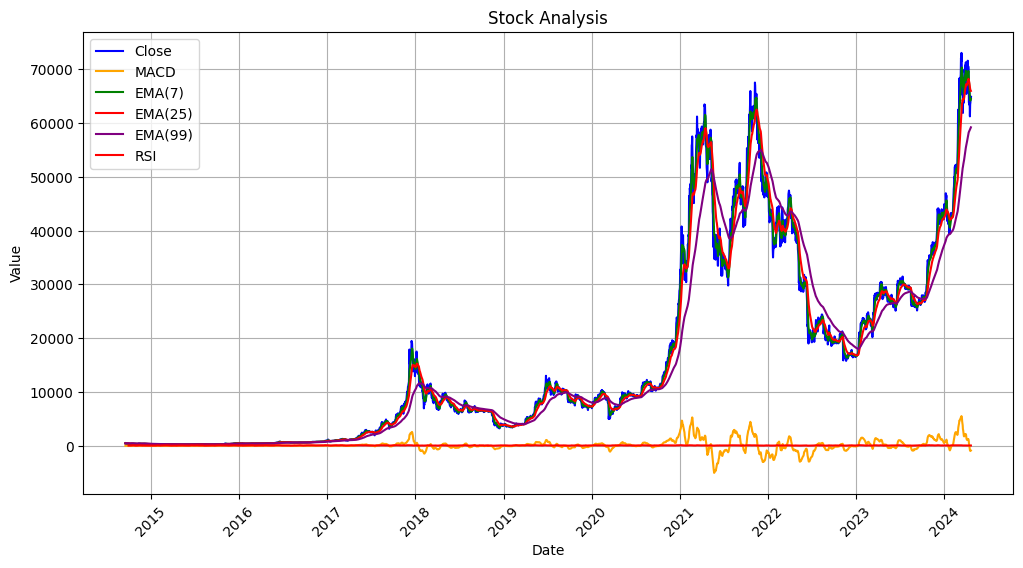

In [130]:
# Plotting
plt.figure(figsize=(12, 6))

# Plotting close price
plt.plot(btc.index, btc['close'], label='Close', color='blue')

# Plotting MACD
plt.plot(btc.index, btc['MACD'], label='MACD', color='orange')

# Plotting EMAs
plt.plot(btc.index, btc['EMA(7)'], label='EMA(7)', color='green')
plt.plot(btc.index, btc['EMA(25)'], label='EMA(25)', color='red')
plt.plot(btc.index, btc['EMA(99)'], label='EMA(99)', color='purple')

# Plotting RSI
plt.plot(btc.index, btc['RSI'], label='RSI', color='red')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Stock Analysis')
plt.legend()
plt.grid(True)

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Display plot
plt.show()

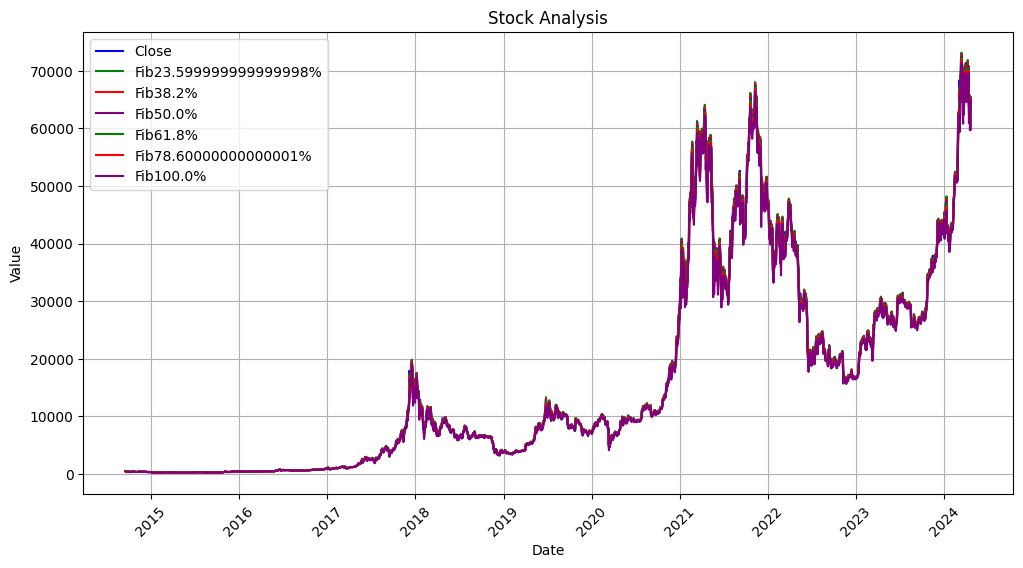

In [131]:
# Plotting
plt.figure(figsize=(12, 6))

# Plotting close price
plt.plot(btc.index, btc['close'], label='Close', color='blue')


# Plotting fibonacci levels
plt.plot(btc.index, btc['Fib23.599999999999998%'], label='Fib23.599999999999998%', color='green')
plt.plot(btc.index, btc['Fib38.2%'], label='Fib38.2%', color='red')
plt.plot(btc.index, btc['Fib50.0%'], label='Fib50.0%', color='purple')
plt.plot(btc.index, btc['Fib61.8%'], label='Fib61.8%', color='green')
plt.plot(btc.index, btc['Fib78.60000000000001%'], label='Fib78.60000000000001%', color='red')
plt.plot(btc.index, btc['Fib100.0%'], label='Fib100.0%', color='purple')


# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Stock Analysis')
plt.legend()
plt.grid(True)

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Display plot
plt.show()

In [257]:
from sklearn.ensemble import RandomForestClassifier

In [258]:
from sklearn.metrics import precision_score

In [296]:
model = RandomForestClassifier(n_estimators=100, min_samples_split=50, random_state=1)

train = btc.iloc[:-200]
test = btc[-200:]

predictors = ["close", "volume", "open", "high", "low", "edit_count", "sentiment", "neg_sentiment"]
model.fit(train[predictors], train["target"])

RandomForestClassifier(min_samples_split=50, random_state=1)

In [297]:
preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["target"], preds)

0.5

In [298]:
preds_train = model.predict(train[predictors])
preds_train = pd.Series(preds_train, index=train.index)
precision_score(train["target"], preds_train)

0.7893401015228426

In [261]:
model1 = RandomForestClassifier(n_estimators=150, min_samples_split=60, random_state=1)

train = btc.iloc[:-200]
test = btc[-200:]

predictors = ["close", "volume", "open", "high", "low", "edit_count", "sentiment", "neg_sentiment"]
model1.fit(train[predictors], train["target"])

RandomForestClassifier(min_samples_split=60, n_estimators=150, random_state=1)

In [262]:
preds1 = model1.predict(test[predictors])
preds1 = pd.Series(preds1, index=test.index)
precision_score(test["target"], preds1)

0.5142857142857142

In [263]:
model2 = RandomForestClassifier(n_estimators=200, min_samples_split=70, random_state=1)

train = btc.iloc[:-200]
test = btc[-200:]

predictors = ["close", "volume", "open", "high", "low", "edit_count", "sentiment", "neg_sentiment"]
model2.fit(train[predictors], train["target"])

RandomForestClassifier(min_samples_split=70, n_estimators=200, random_state=1)

In [264]:
preds2 = model2.predict(test[predictors])
preds2 = pd.Series(preds2, index=test.index)
precision_score(test["target"], preds2)

0.5277777777777778

In [265]:
model3 = RandomForestClassifier(n_estimators=200, min_samples_split=45, random_state=1)

train3 = btc.iloc[:-99]
test3 = btc[-99:]

predictors = ["close", "volume", "open", "high", "low", "edit_count", "sentiment", "neg_sentiment"]
model3.fit(train3[predictors], train3["target"])

RandomForestClassifier(min_samples_split=45, n_estimators=200, random_state=1)

In [266]:
preds3 = model3.predict(test3[predictors])
preds3 = pd.Series(preds3, index=test3.index)
precision_score(test3["target"], preds3)

0.7272727272727273

In [267]:
# Back testing
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="predictions")
    combined = pd.concat([test["target"], preds], axis=1)
    return combined

In [268]:
def backtest(data, model, predictors, start=1095, step=150):
    all_predictions = []
    
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
        
    return pd.concat(all_predictions)

In [269]:
from xgboost import XGBClassifier

In [270]:
model = XGBClassifier(random_state=1, learning_rate=0.1, n_estimators=200)
predictions = backtest(btc, model, predictors)

In [271]:
precision_score(predictions["target"], predictions["predictions"])

0.507473841554559

In [278]:
def compute_rolling(btc):
    horizons = [2, 7, 60, 365]
    new_predictors = ["close", "sentiment", "neg_sentiment"]
    
    for horizon in horizons:
        rolling_averages = btc.rolling(horizon, min_periods=1).mean()
        
        ratio_column = f"close_ratio_{horizon}"
        btc[ratio_column] = btc["close"] / rolling_averages["close"]
                                       
        edit_column = f"edit_{horizon}"
        btc[edit_column] = rolling_averages["edit_count"]
                                       
        rolling = btc.rolling(horizon, closed="left", min_periods=1).mean()
        trend_column = f"trend_{horizon}"
        btc[trend_column] = rolling["target"]
                                       
        new_predictors += [ratio_column, edit_column]
    return btc, new_predictors

In [279]:
btc, new_predictors = compute_rolling(btc.copy())

In [280]:
btc

,open,high,low,close,volume,edit_count,sentiment,neg_sentiment,tomorrow,target,...,trend_2,close_ratio_7,edit_7,trend_7,close_ratio_60,edit_60,trend_60,close_ratio_365,edit_365,trend_365
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,5.033333,-0.232191,0.532718,424.440002,0,...,NaN,1.000000,5.033333,NaN,1.000000,5.033333,NaN,1.000000,5.033333,NaN
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,5.066667,-0.232760,0.532718,394.795990,0,...,0.0,0.962696,5.050000,0.000000,0.962696,5.050000,0.000000,0.962696,5.050000,0.000000
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,5.200000,-0.235415,0.549385,408.903992,1,...,0.0,0.927789,5.100000,0.000000,0.927789,5.100000,0.000000,0.927789,5.100000,0.000000
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,5.200000,-0.233185,0.549385,398.821014,0,...,0.5,0.970419,5.125000,0.333333,0.970419,5.125000,0.333333,0.970419,5.125000,0.333333
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,5.233333,-0.204017,0.532718,402.152008,1,...,0.5,0.956729,5.146667,0.250000,0.956729,5.146667,0.250000,0.956729,5.146667,0.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-12,70061.382812,71222.742188,65254.835938,67195.867188,44129299406,0.333333,-0.096713,0.133333,63821.472656,0,...,0.0,0.966106,0.285714,0.571429,1.052915,0.771667,0.566667,1.777106,1.924384,0.509589
2024-04-13,67188.375000,67931.429688,60919.105469,63821.472656,52869738185,0.333333,-0.096713,0.133333,65738.726562,1,...,0.0,0.927255,0.295238,0.428571,0.996377,0.772778,0.566667,1.683798,1.924292,0.506849
2024-04-14,63836.230469,65824.429688,62205.851562,65738.726562,49084320047,0.333333,-0.096713,0.133333,63426.210938,0,...,0.5,0.962349,0.304762,0.428571,1.022607,0.775000,0.566667,1.729951,1.924201,0.509589
2024-04-15,65739.648438,66878.648438,62332.070312,63426.210938,43595917654,0.333333,-0.096713,0.133333,62875.835938,0,...,0.5,0.944706,0.314286,0.285714,0.983705,0.776667,0.550000,1.665121,1.924110,0.509589


In [281]:
predictions = backtest(btc, model, new_predictors)

In [282]:
precision_score(predictions["target"], predictions["predictions"])

0.5157894736842106